In [1]:
import csv
# import openslide
# from openslide import ImageSlide, open_slide
import os
import glob
# import cv2

# train_path = "../data/"
# train_path=['/sfs/qumulo/qhome/ss4yd/working/data2/Celiac' ,
#             '/sfs/qumulo/qhome/ss4yd/working/data2/Normal' ]
train_path = "/home/ubuntu/working/data3/"
images = {}
labels = {}
img_names = [] 
labels_index=[1, 1, 2,2, 0]

labels_Map=["Normal", "EE", "Celiac"]
print('Reading images')
# for i in range(len(train_path)):
files = glob.glob(os.path.join(train_path, '*.svs'))
for fl in files:
    flbase = os.path.basename(fl)
    flbase_noext = os.path.splitext(flbase)[0]
    images[flbase_noext]=fl 
    # labels[flbase_noext]=labels_index[i]

print(images)
print('Reading patches')
patches=[]
patches_dir='/home/ubuntu/working/patches_r_0/'
for fl in glob.glob(os.path.join(patches_dir, '*.txt')):
    flbase = os.path.basename(fl)
    # if flbase in needed_patches:
    patches.append(fl)

# print(images)

train_images = []   
train_labels = []
for i in range(0,len(patches)): 
        flbase = os.path.basename(patches[i])
        flbase_parts = flbase.split('_')
#         print(flbase_parts)
        case_name=flbase_parts[0]+"_"+flbase_parts[1]
        if case_name.startswith("EE"):
            case_name=case_name+"_"+flbase_parts[2]
        if case_name not in images:
            continue
        # if(flbase not in cv_files[fold]):
            # log_file.write("%s\n"%patches[i])
            # train_files_count=train_files_count+1
        with open(patches[i],'r') as intputFile:
            reader=csv.reader(intputFile,delimiter=',')
            for x,y in reader: 
                train_images.append([images[case_name],x,y])  
                # train_labels.append(labels[case_name])

# print(train_images)
print(len(train_images))
train_images


Reading images
{'N17-65_00': '/home/ubuntu/working/data3/N17-65_00.svs', 'C17-83_04': '/home/ubuntu/working/data3/C17-83_04.svs', '130382_6718_001': '/home/ubuntu/working/data3/130382_6718_001.svs'}
Reading patches
664


[['/home/ubuntu/working/data3/C17-83_04.svs', '666', '10989'],
 ['/home/ubuntu/working/data3/C17-83_04.svs', '666', '11322'],
 ['/home/ubuntu/working/data3/C17-83_04.svs', '666', '11655'],
 ['/home/ubuntu/working/data3/C17-83_04.svs', '999', '10323'],
 ['/home/ubuntu/working/data3/C17-83_04.svs', '999', '10656'],
 ['/home/ubuntu/working/data3/C17-83_04.svs', '999', '10989'],
 ['/home/ubuntu/working/data3/C17-83_04.svs', '999', '11322'],
 ['/home/ubuntu/working/data3/C17-83_04.svs', '999', '11655'],
 ['/home/ubuntu/working/data3/C17-83_04.svs', '999', '11988'],
 ['/home/ubuntu/working/data3/C17-83_04.svs', '1332', '9324'],
 ['/home/ubuntu/working/data3/C17-83_04.svs', '1332', '9657'],
 ['/home/ubuntu/working/data3/C17-83_04.svs', '1332', '9990'],
 ['/home/ubuntu/working/data3/C17-83_04.svs', '1332', '10323'],
 ['/home/ubuntu/working/data3/C17-83_04.svs', '1332', '10656'],
 ['/home/ubuntu/working/data3/C17-83_04.svs', '1332', '10989'],
 ['/home/ubuntu/working/data3/C17-83_04.svs', '1332'

In [2]:
from openslide import ImageSlide, open_slide
import openslide
from PIL import Image

width_height = (256,256)
count=0
# resized images
for images in train_images:
    count+=1
    op_slide_img = open_slide(images[0])
    x = int(images[1])
    y = int(images[2])
    
    img = op_slide_img.read_region((x,y), 0, (1000,1000))
    img = img.resize(width_height, Image.ANTIALIAS)
    jpg_img = img.convert('RGB')
    image_name = images[0].split('/')[-1]
    print(count)
    jpg_img.save('./resized_jpg/'+image_name + '_' + str(x) + '_' + str(y) + '.jpg')


# w,h=op_slide_img.level_dimensions[0]
# ratio_x=(x-500)/w
# ratio_y=(y-500)/h

# new_w,new_h=slide.level_dimensions[1]
# new_x=int(ratio_x*new_w)
# new_y=int(ratio_y*new_h)



1
2
3


KeyboardInterrupt: 

In [7]:
# op_slide_img.read_region((x,y), 0, (1000,1000))

In [52]:
train_dict = {}
for i in range(0,len(patches)): 
        flbase = os.path.basename(patches[i])
        flbase_parts = flbase.split('_')
#         print(flbase_parts)
        case_name=flbase_parts[0]+"_"+flbase_parts[1]
        if case_name.startswith("EE"):
            case_name=case_name+"_"+flbase_parts[2]
        if case_name not in images:
            continue
        # if(flbase not in cv_files[fold]):
            # log_file.write("%s\n"%patches[i])
            # train_files_count=train_files_count+1
        with open(patches[i],'r') as intputFile:
            reader=csv.reader(intputFile,delimiter=',')
            for x,y in reader: 
                train_images.append([images[case_name],x,y])  
                # train_labels.append(labels[case_name])

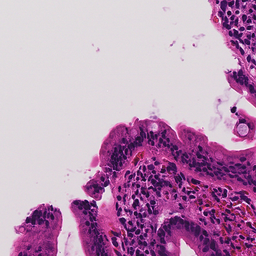

In [64]:
from PIL import Image
img = op_slide_img.read_region((x,y), 0, (1000,1000))
# print(i)
wh = (256,256)
img.resize(wh, Image.ANTIALIAS)

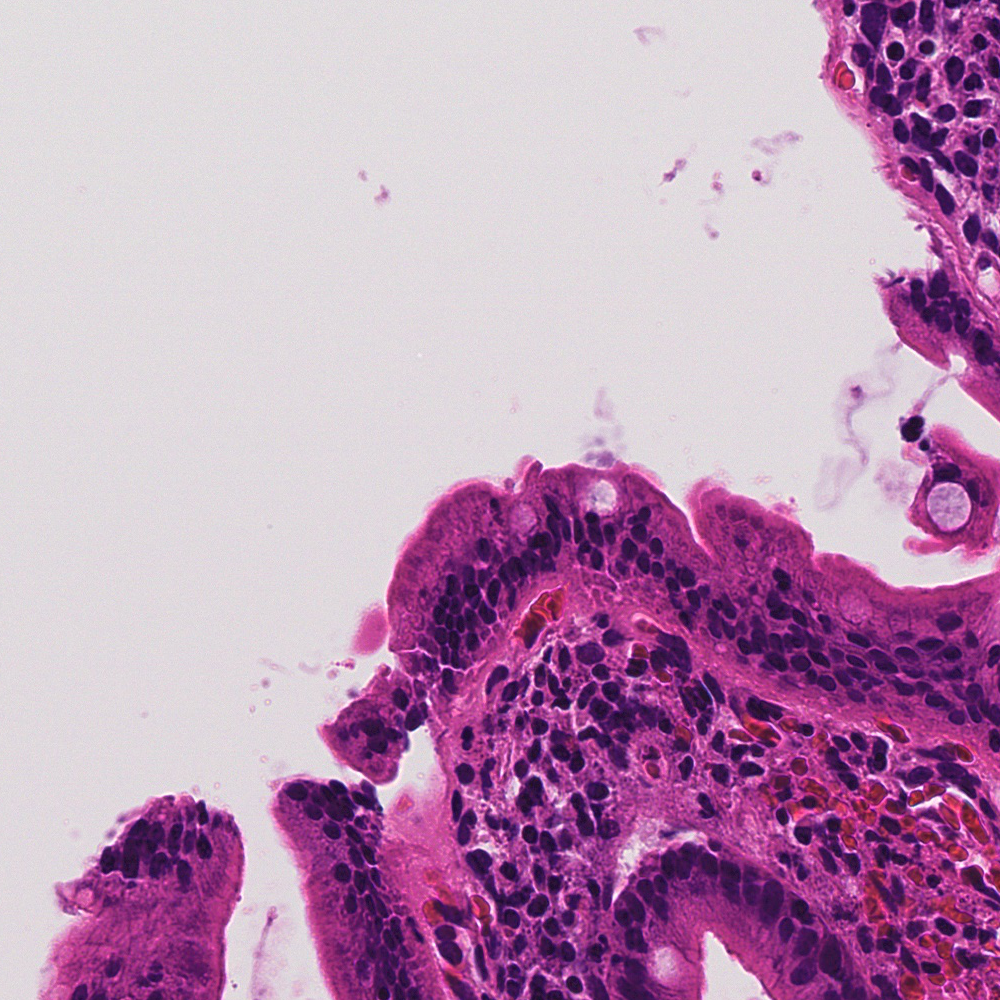

In [2]:
from openslide import open_slide
op_slide_img = open_slide(train_images[0][0])
# op_slide_img.read_region((x,y), 0, (1000,1000))
# op_slide_img.read_region((int(train_images[0][1]),int(train_images[0][2])), 0, (1000,1000))
op_slide_img.read_region((int(train_images[0][1]),int(train_images[0][2])),0,(1000,1000))

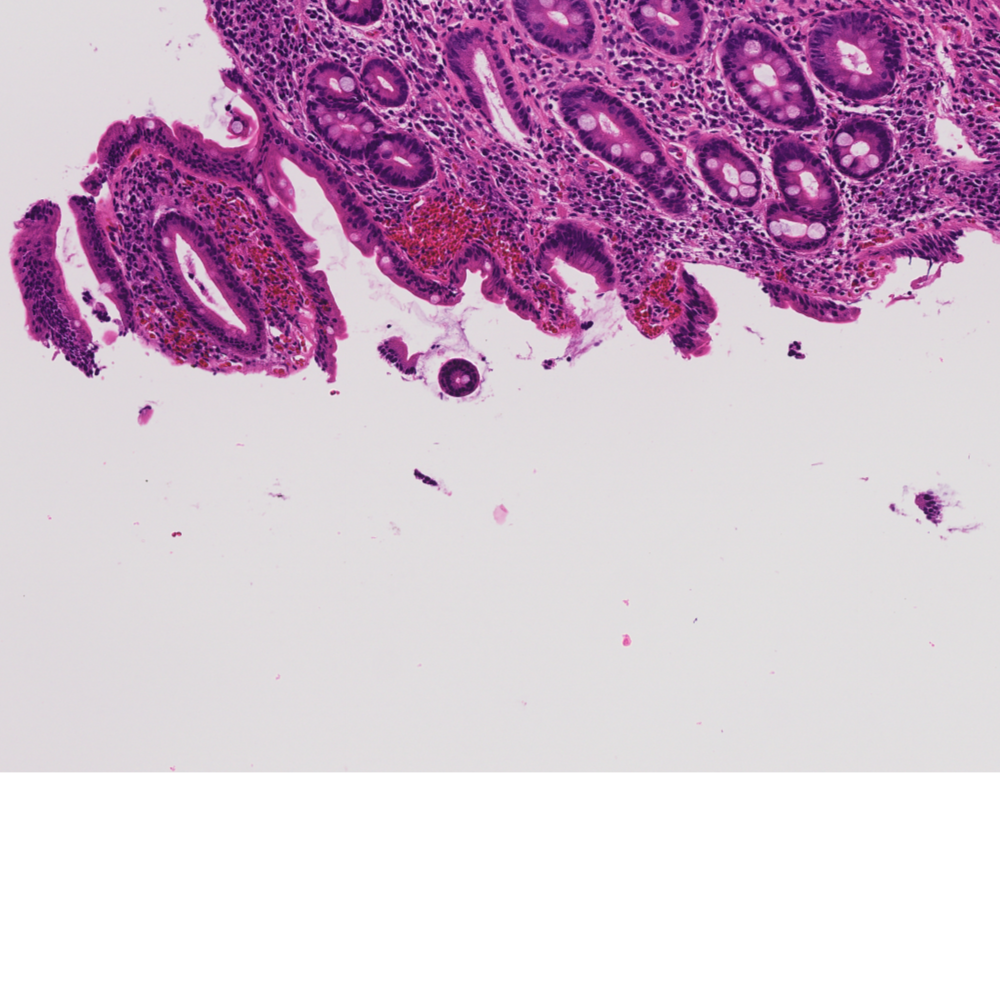

In [10]:
op_slide_img.read_region((int(train_images[0][1]),int(train_images[0][2])),1,(1000,1000))

In [3]:
op_slide_img.level_dimensions

((7835, 14077), (1958, 3519), (979, 1759))